<a href="https://colab.research.google.com/github/DanielaJim07/Simulaci-n-I/blob/main/FlechaBOXMULLER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO
Una flecha sera ensamblada en un cojinete:

Si $X_1$ sigue una distribucion con media 1.5 y varianza 0.0016, y $X_2$ sigue esta misma distrubucion con media 1.48 y varianza 0.0009 determina la probabilidad
 a) Cuando hay interferencia
 b) El numero de veces que sea necesario hacer simulaciones, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%





##Solución analitica

## Paso 1: Probabilidad de Interferencia  

Queremos calcular la probabilidad de que la variable $ x_2 $ sea mayor o igual que $x_1 $:

$$
P(x_2 \geq x_1)
$$

Sean las variables:

$$
x_1 \sim N(\mu_1, \sigma_1^2) = N(1.5, 0.0016)
$$
$$
x_2 \sim N(\mu_2, \sigma_2^2) = N(1.48, 0.0009)
$$

Definimos la variable diferencia:

$$
D = x_2 - x_1
$$

Como $ x_1 $ y $ x_2 $ son independientes:

$$
D \sim N(\mu_D, \sigma_D^2)
$$

donde:

$$
\mu_D = \mu_2 - \mu_1 = 1.48 - 1.5 = -0.02
$$
$$
\sigma_D^2 = \sigma_1^2 + \sigma_2^2 = 0.0016 + 0.0009 = 0.0025 \Rightarrow \sigma_D = \sqrt{0.0025} = 0.05
$$

Entonces, la probabilidad de interferencia es:

$$
P(x_2 \geq x_1) = P(D \geq 0)
$$

Estandarizamos la variable \( D \):

$$
Z = \frac{0 - \mu_D}{\sigma_D} = \frac{0 - (-0.02)}{0.05} = \frac{0.02}{0.05} = 0.4
$$

Usando la tabla de la normal estándar:

$$
P(Z \geq 0.4) = 1 - P(Z < 0.4) = 1 - 0.6554 = 0.3446
$$

**Resultado:**

$$
P(x_2 \geq x_1) = 34.46\%
$$

---

## Paso 2: Número de Simulaciones Necesarias

Usamos la fórmula para el tamaño de muestra en una proporción:

$$
n = \left( \frac{z \cdot \sqrt{p(1 - p)}}{E} \right)^2
$$

Donde:
- $$ p = 0.3446 $$
- $$ E = 0.01 $$ (error máximo permitido)
- $$ z = 1.96 $$ (nivel de confianza del 95%)

Cálculo:

$$
n = \left( \frac{1.96 \cdot \sqrt{0.3446 \cdot 0.6554}}{0.01} \right)^2 = 8676.29 \approx 8677
$$

**Resultado:**

$$
n = 8677 simulaciones
$$


In [2]:
# Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


#CODIGO
**Método Box Muller**
## 1. Variables:

\begin{equation}
x_1 \sim N(1.5 , 0.04)
\end{equation}

\begin{equation}
x_2 \sim N(1.48 , 0.03)
\end{equation}

##2.
\begin{equation}
x_1 \thicksim f(x) = \frac{1}{\sqrt{2\pi}(0.04)} \, e^{-\frac{1}{2} \left( \frac{x - 1.5}{0.04} \right)^2}, \quad -\infty < x < \infty
\end{equation}

\begin{equation}
x_2 \thicksim f(x) = \frac{1}{\sqrt{2\pi}(0.003)} \, e^{-\frac{1}{2} \left( \frac{x - 1.48}{0.003} \right)^2}, \quad -\infty < x < \infty
\end{equation}

##3.
Box-Muller convierte dos variables aleatorias uniformes  $U_1,U_2$  en dos variables normales independientes

##4.
\begin{equation}
x_1 \geq x_2
\end{equation}

Buscamos

\begin{equation}
P(x_1 \geq x_2)
\end{equation}

##5.

n=10 cantidad de veces

Generar dos numeros aleatorios $(x_1 , x_2)$

In [3]:
# Parámetros de las distribuciones
mu_x1 = 1.5
sig_x1 = np.sqrt(0.0016)  # σ₁ = 0.04
mu_x2 = 1.48
sig_x2 = np.sqrt(0.0009)  # σ₂ = 0.03

In [4]:
# Función que simula un experimento n veces y estima la probabilidad de que x2 > x1
def experimento(n=10):
    exitos = 0
    for _ in range(n):
        x1 = np.random.normal(mu_x1, sig_x1)
        x2 = np.random.normal(mu_x2, sig_x2)
        if x2 > x1:
            exitos += 1
    return exitos / n  # estimación de P(x2 > x1)



In [5]:
# Función que genera una lista de estimaciones acumuladas
def muestra(M):
    """
    Simula M experimentos, donde en el experimento i se hacen i repeticiones,
    y se guarda la estimación correspondiente.
    """
    estimaciones = []
    for i in range(1, M + 1):
        estimacion = experimento(i)
        estimaciones.append(estimacion)
    return estimaciones


##PASO 6:

Repetir M veces el experimento

In [6]:
# a) Cálculo teórico de la probabilidad de interferencia P(x2 ≥ x1)
mu_D = mu_x2 - mu_x1
sigma_D = np.sqrt(sig_x1**2 + sig_x2**2)
prob_teorica = 1 - norm.cdf(0, loc=mu_D, scale=sigma_D)
print(f"Probabilidad teórica de interferencia: {prob_teorica:.4f}")

Probabilidad teórica de interferencia: 0.3446


In [7]:

# b) Cálculo del tamaño de muestra necesario para una estimación con ±0.01 de error y 95% de confianza
z = 1.96  # valor z para 95% de confianza
E = 0.01  # error máximo permitido
n_simulaciones = int(np.ceil((z**2 * prob_teorica * (1 - prob_teorica)) / E**2))
print(f"Número de simulaciones necesarias: {n_simulaciones}")

Número de simulaciones necesarias: 8677


##Paso  7

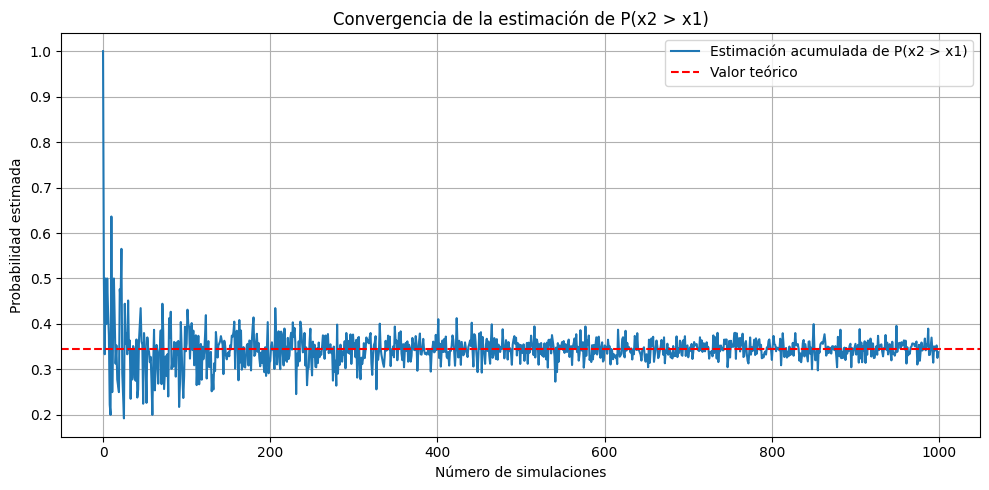

In [8]:
# Gráfica de convergencia de la estimación
M = 1000
estimaciones = muestra(M)
plt.figure(figsize=(10, 5))
plt.plot(estimaciones, label="Estimación acumulada de P(x2 > x1)")
plt.axhline(y=prob_teorica, color='r', linestyle='--', label="Valor teórico")
plt.xlabel("Número de simulaciones")
plt.ylabel("Probabilidad estimada")
plt.title("Convergencia de la estimación de P(x2 > x1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()